# Método para solução de sistemas lineares do tipo "Kd=F"

## Solução de sistemas invertendo a Matriz K

### Feito por: Leonardo Minski

In [48]:
#Bibliotecas importadas

import numpy as np # Version: 1.24.3
from IPython.display import display, Math, HTML # Version 8.11.0
import matplotlib.pyplot as plt # Version: 3.7.2

In [49]:
#Dados de entrada

E = 3000 #kN/cmˆ2
bw = 15 # cm
h = 40 # cm OBS: Se a altura fosse maior que 1m, esse modelo já não funcionaria mais bem
I = bw*h**3/12 # cmˆ4
L = 100 # cm

#Diferentes intensidades de força [kN]

P1 = 50 
P2 = 70 
P3 = 90


Graus_de_Liberdade_Restringidos = [0, 4] # Graus onde não se permite deslocamento ou rotação


Ke = np.array([[12*E*I/L**3, 6*E*I/L**2, -12*E*I/L**3, 6*E*I/L**2],
      [6*E*I/L**2,  4*E*I/L,    -6*E*I/L**2,  2*E*I/L],
      [-12*E*I/L**3, -6*E*I/L**2, 12*E*I/L**3, -6*E*I/L**2],
      [6*E*I/L**2, 2*E*I/L, -6*E*I/L**2, 4*E*I/L]])

print(Ke)

[[ 2.88e+03  1.44e+05 -2.88e+03  1.44e+05]
 [ 1.44e+05  9.60e+06 -1.44e+05  4.80e+06]
 [-2.88e+03 -1.44e+05  2.88e+03 -1.44e+05]
 [ 1.44e+05  4.80e+06 -1.44e+05  9.60e+06]]


In [50]:
#Número de nós e GDL definidos a partir do número de barras
Num_Barras = 2
Numero_Nos = Num_Barras + 1 
Graus_Liberdade = Numero_Nos * 2 # Graus de liberdade, no caso é deslocamento, rotação, deslocamento, rotação e assim por diante...

#Gerando matriz de zeros

Matriz_geral = np.zeros((Graus_Liberdade, Graus_Liberdade))

Matriz_geral # Matriz de rigidez geral


array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [51]:
# Lista para armazenar as matrizes de rigidez locais
Matriz_Rigidez_Local = []

# Loop para adicionar as matrizes de rigidez local à matriz de rigidez global
for i in range(Num_Barras):
    # Cria uma cópia da matriz de rigidez local
    Matriz_Rigidez_Local_i = np.copy(Matriz_geral)
    print(Matriz_Rigidez_Local_i[0:4, 0:4])
    # Atualiza a submatriz correspondente da matriz de rigidez local na matriz de rigidez global
    Matriz_Rigidez_Local_i[i *  2 : 4 + i * 2, i * 2 : 4 + i * 2] += Ke
   
    # Adiciona a matriz de rigidez local à lista
    Matriz_Rigidez_Local.append(Matriz_Rigidez_Local_i)

for lista in Matriz_Rigidez_Local:
    Matriz_geral = Matriz_geral + lista

Matriz_geral_completa = Matriz_geral

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [52]:
for line in Matriz_Rigidez_Local[1]:
    print(line)


[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[     0.      0.   2880. 144000.  -2880. 144000.]
[      0.       0.  144000. 9600000. -144000. 4800000.]
[      0.       0.   -2880. -144000.    2880. -144000.]
[      0.       0.  144000. 4800000. -144000. 9600000.]


In [53]:
Graus_de_Liberdade_Restringidos.sort(reverse=True) # invertendo para não remover termos errados

Matriz_geral = np.array(Matriz_geral)
Matriz_geral = np.delete(Matriz_geral, Graus_de_Liberdade_Restringidos, axis=0) # Removendo linha
Matriz_geral = np.delete(Matriz_geral, Graus_de_Liberdade_Restringidos, axis=1) # Removendo coluna

for lines in Matriz_geral: # Removido as linhas e colunas não necessárias
    print(lines)

[9600000. -144000. 4800000.       0.]
[-144000.    5760.       0.  144000.]
[ 4800000.        0. 19200000.  4800000.]
[      0.  144000. 4800000. 9600000.]


In [54]:
Matriz_geral_invertida = np.linalg.inv(Matriz_geral) # K elevado a -1, inversão de matriz.

In [55]:
F = [0, 0, -P1, 0, 0, 0] # Remover via GDL da lista

[F.pop(index) for index in sorted(Graus_de_Liberdade_Restringidos, reverse=True)]

# Multiplicar cada linha da matriz pelo vetor
Deslocamentos = [np.dot(linha, F) for linha in Matriz_geral_invertida]

Deslocamentos

[-0.0005208333333333332, -0.03472222222222222, 0.0, 0.0005208333333333332]

In [56]:
desloc_aux = np.zeros((Graus_Liberdade))

idx = 0
for index in range(Graus_Liberdade):
    if index not in Graus_de_Liberdade_Restringidos:
        desloc_aux[index] = Deslocamentos[idx]
        idx += 1

desloc_aux # Adicionados os graus de liberdade igual a zero para os outros cálculos

array([ 0.        , -0.00052083, -0.03472222,  0.        ,  0.        ,
        0.00052083])

In [57]:
ReacoesApoio = np.array(Matriz_geral_completa) @ np.array(desloc_aux)
ReacoesApoio

array([ 2.50000000e+01,  0.00000000e+00, -5.00000000e+01, -1.00364161e-13,
        2.50000000e+01, -2.00728323e-13])

In [58]:
vetor_final = []

for i in range(Matriz_Rigidez_Local.__len__()):

    inicio = i*2
    fim = i * 2 + 4
    vetor_resultado = np.array(Matriz_Rigidez_Local[i][inicio:fim]) @ np.array(desloc_aux)
    print(vetor_resultado)

    vetor_final.append(vetor_resultado[1])
    vetor_final.append(vetor_resultado[3])

#Filtrando valores repetidos
valores_a_dropar = []
for i in range(2, len(vetor_final), 2):
    valores_a_dropar.append(i)


vetor_filtrado = [vetor_final[i] for i in range(len(vetor_final)) if i not in valores_a_dropar]

    

[  25.    0.  -25. 2500.]
[-2.50000000e+01 -2.50000000e+03  2.50000000e+01 -2.00728323e-13]


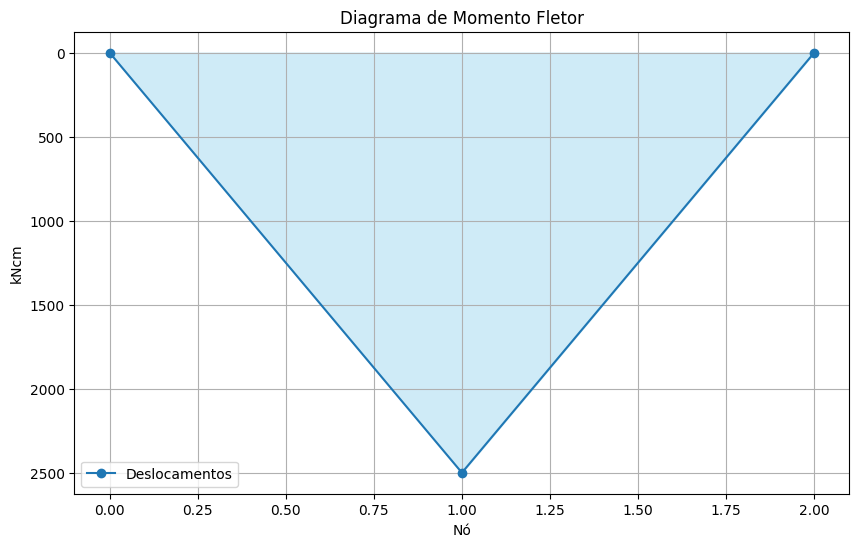

In [59]:
x = np.arange(0, Numero_Nos, 1)

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, vetor_filtrado, marker='o', label='Deslocamentos')
plt.fill_between(x, vetor_filtrado, color='skyblue', alpha=0.4)

# Adicionando título e rótulos
plt.title('Diagrama de Momento Fletor')
plt.xlabel('Nó')
plt.ylabel('kNcm')
plt.gca().invert_yaxis()
# Adicionando grade
plt.grid(True)

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.show()

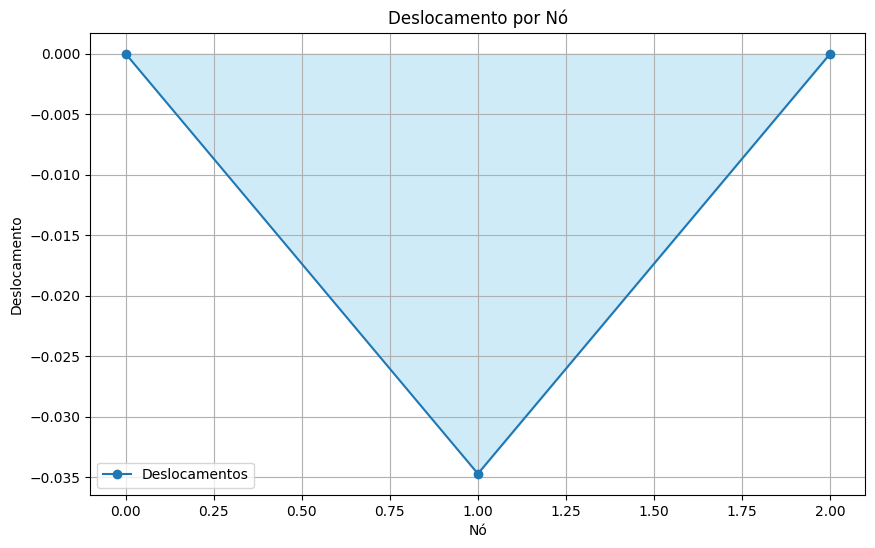

In [60]:
deslocamentos_plot = []
fletores = []
for i in range(0, len(desloc_aux), 2):

    deslocamentos_plot.append(desloc_aux[i])

x = np.arange(0, Numero_Nos, 1)

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, deslocamentos_plot, marker='o', label='Deslocamentos')
plt.fill_between(x, deslocamentos_plot, color='skyblue', alpha=0.4)

# Adicionando título e rótulos
plt.title('Deslocamento por Nó')
plt.xlabel('Nó')
plt.ylabel('Deslocamento')

# Adicionando grade
plt.grid(True)

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.show()

DESAFIO: Fazer para elemento de barra

In [61]:
E = 3000 #kN/cmˆ2
bw = 15 # cm
h = 40 # cm
I = bw*h**3/12# cmˆ4
L = 100 # cm
P = 50 #kN
A = bw * h
Graus_de_Liberdade_Restringidos = [0, 1] # Python começa no zero


Ke = np.array([[E*A/L, -E*A/L],
              [-E*A/L, E*A/L]])

print(Ke)

[[ 18000. -18000.]
 [-18000.  18000.]]


In [62]:
#Número de nós é igual a 3 e o número de graus de liberdade é igual a 6
Num_Barras = 2
Numero_Nos = Num_Barras + 1 
Graus_Liberdade = Numero_Nos  # Graus de liberdade, no caso é tensão axial apenas.

# Matriz_geral = [] # Matriz principal onde vão ser adicionados os valores
# for i in range(Graus_Liberdade): # Matriz quadrada
#    Matriz_geral.append(np.zeros(Graus_Liberdade))

Matriz_geral = np.zeros((Graus_Liberdade, Graus_Liberdade))

Matriz_geral # Matriz de rigidez geral


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [63]:
# Lista para armazenar as matrizes de rigidez locais
Matriz_Rigidez_Local = []

# Loop para adicionar as matrizes de rigidez local à matriz de rigidez global
for i in range(Num_Barras):
    # Cria uma cópia da matriz de rigidez local
    Matriz_Rigidez_Local_i = np.copy(Matriz_geral)
    print(Matriz_Rigidez_Local_i[0:3, 0:3])
    # Atualiza a submatriz correspondente da matriz de rigidez local na matriz de rigidez global
    Matriz_Rigidez_Local_i[i : 2 + i * 1, i * 1 : 2 + i * 1] += Ke
   
    # Adiciona a matriz de rigidez local à lista
    Matriz_Rigidez_Local.append(Matriz_Rigidez_Local_i)

for lista in Matriz_Rigidez_Local:
    Matriz_geral = Matriz_geral + lista

Matriz_geral_completa = Matriz_geral

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [64]:
Graus_de_Liberdade_Restringidos.sort(reverse=True) # invertendo para não remover termos errados

Matriz_geral = np.array(Matriz_geral)
Matriz_geral = np.delete(Matriz_geral, Graus_de_Liberdade_Restringidos, axis=0) # Removendo linha
Matriz_geral = np.delete(Matriz_geral, Graus_de_Liberdade_Restringidos, axis=1) # Removendo coluna

Matriz_geral # Removido as linhas e colunas não necessárias

array([[18000.]])

In [65]:
Matriz_geral_invertida = np.linalg.inv(Matriz_geral) # K elevado a -1, inversão de matriz.

Matriz_geral_invertida

array([[5.55555556e-05]])

In [66]:
F = [0, -P, 0] # Remover via GDL da lista

[F.pop(index) for index in sorted(Graus_de_Liberdade_Restringidos, reverse=True)]

# Multiplicar cada linha da matriz pelo vetor
Deslocamentos = [np.dot(linha, F) for linha in Matriz_geral_invertida]

Deslocamentos

[0.0]

In [67]:
desloc_aux = np.zeros((Graus_Liberdade))

idx = 0
for index in range(Graus_Liberdade):
    if index not in Graus_de_Liberdade_Restringidos:
        desloc_aux[index] = Deslocamentos[idx]
        idx += 1

desloc_aux # Adicionados os graus de liberdade igual a zero para os outros cálculos

array([0., 0., 0.])

In [68]:
ReacoesApoio = np.array(Matriz_geral_completa) @ np.array(desloc_aux)
ReacoesApoio

array([0., 0., 0.])